### Installazione delle librerie necessarie (necessario riavvio sessione)

In [1]:
!set CMAKE_ARGS=-DGGML_CUDA=on
!set FORCE_CMAKE=1

!pip uninstall numpy pandas -y
!pip install numpy==1.26.4 pandas==2.1.4

# Installa llama-cpp-python con supporto CUDA
!python -m pip install llama-cpp-python --prefer-binary --extra-index-url=https://jllllll.github.io/llama-cpp-python-cuBLAS-wheels/AVX2/cu122 --force-reinstall

# Installa PyTorch con supporto CUDA
!pip install torch==2.3.0 torchvision torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.1.4
Uninstalling pandas-2.1.4:
  Successfully uninstalled pandas-2.1.4
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)


Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.1.4 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://jllllll.github.io/llama-cpp-python-cuBLAS-wheels/AVX2/cu122
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.1/28.1 MB 17.4 MB/s eta 0:00:00
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached diskcache-5.6.3-py3-none-any.whl.metadata (20 kB)
Using cached diskcache-5.6.3-py3-none-any.whl (45 kB)
Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_ext

In [2]:
# FROM GITHUB SOURCE
import os
import re

!git clone https://github.com/disi-unibo-nlp/nlg-metricverse.git
os.chdir("/content/nlg-metricverse/")
!pip install -v . --quiet

#!pip install transformers

Cloning into 'nlg-metricverse'...
remote: Enumerating objects: 4223, done.
remote: Counting objects: 100% (1999/1999), done.
remote: Compressing objects: 100% (684/684), done.
remote: Total 4223 (delta 1405), reused 1837 (delta 1283), pack-reused 2224 (from 1)
Receiving objects: 100% (4223/4223), 13.57 MiB | 12.05 MiB/s, done.
Resolving deltas: 100% (2609/2609), done.
Processing /content/nlg-metricverse
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
INFO: 

# **Data augmentation per la generazione di fake news**

### Download del modello

In [ ]:
import huggingface_hub
from huggingface_hub import hf_hub_download

# Define the model name and file
model_name = "MaziyarPanahi/Llama-3-8B-Instruct-v0.10-GGUF"
#model_file = "Llama-3-8B-Instruct-v0.10.Q4_K_M.gguf"
#model_file = "Llama-3-8B-Instruct-v0.10.Q5_K_M.gguf"
model_file = "Llama-3-8B-Instruct-v0.10.Q8_0.gguf"

# Download the model from Hugging Face Hub
model_path = hf_hub_download(
    model_name,
    filename = model_file,
    local_dir = 'models/',  # Download the model to the "models" folder
    )

#Copia il path nel prossimo comando
print("My model path:", model_path)

Llama-3-8B-Instruct-v0.10.Q8_0.gguf:   0%|          | 0.00/8.54G [00:00<?, ?B/s]

My model path: models/Llama-3-8B-Instruct-v0.10.Q8_0.gguf


### Caricamento del modello

In [ ]:
from llama_cpp import Llama

# Percorso del file scaricato da Hugging Face su Colab
#model_path = "/content/models/Llama-3-8B-Instruct-v0.10.Q4_K_M.gguf"
#model_path = "/content/models/Llama-3-8B-Instruct-v0.10.Q5_K_M.gguf"
model_path = "/content/models/Llama-3-8B-Instruct-v0.10.Q8_0.gguf"

# Caricamento del modello
llm = Llama(model_path = model_path,
            n_batch = 1024, # Numero di token che il modello processa simultaneamente (tra 1 e n_ctx)
            n_ctx = 4096, # Ampiezza finestra di contesto
            chat_format = "llama-2", #formato input/output per LLM
            n_gpu_layers = -1) # Caricamento del modello in modo da utilizzare la GPU

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### Creazione delle liste di articoli

In [ ]:
import pandas as pd
import random
import torch

# Constants
SEED = 34

# Set seed for reproducibility
torch.manual_seed(SEED)

# Load the data
def load_data(file_path):
    return pd.read_excel(file_path)

data_path = 'FakeCTI.xlsx'
data = load_data(data_path)

# Conta quante volte ogni campagna compare nel file
campaign_counts = data['CAMPAGNA'].value_counts()

# Filtra solo le campagne che hanno più di 4 articoli e meno di 2000
filtered_campaigns = campaign_counts[(campaign_counts > 4) & (campaign_counts < 2000)].index

# Scegli una campagna casuale tra quelle disponibili nel file o selezionane una a mano
if len(filtered_campaigns) > 0:
    campaign = random.choice(filtered_campaigns)
else:
    print("Nessuna campagna con più di 4 occorrenze trovata.")

#campaign = 'Coronavirus and vaccines in America' #8 articoli
#campaign = 'Vaccines and illnesses fake news' #18 articoli
#campaign = 'Disinformation on armed forces for Ukraine' #27 articoli
campaign = 'Viral Fake Election News' #campagna da usare per il detector visto che abbiamo delle notizie True in 'TrueCTI.xlsx'
print(f"Campagna scelta: {campaign}")

campaign_news = data[data['CAMPAGNA'] == campaign]
print(f"Numero di notizie nella campagna '{campaign}': {campaign_news.shape[0]}")

# Funzione per contare il numero di parole in un esempio
def count_words(example):
    return len(example.split())

# Funzione per formattare un articolo
def format_example(row):
    return f"ARTICLE {row['ID']}\nTITLE: {row['TITOLO']}\nTEXT: {row['TESTO']}\n"

# Funzione per creare le liste example e comparison
def create_example_and_comparison(news_df, max_words):
    example_list = []
    comparison_articles = []
    current_word_count = 0

    news_list = news_df.index.tolist()
    random.shuffle(news_list)  # Mischia gli articoli

    for idx in news_list:
        article = news_df.loc[idx]
        formatted_example = format_example(article)
        word_count = count_words(formatted_example)

        # Verifica se l'articolo può essere aggiunto alla example list
        if current_word_count + word_count <= max_words:
            example_list.append(formatted_example)
            current_word_count += word_count
        else:
            # Se non c'è più spazio, aggiungi l'articolo nella comparison list
            comparison_articles.append(formatted_example)

    return example_list, comparison_articles

# Crea le due liste
example_list, comparison_articles = create_example_and_comparison(campaign_news, 2000)

# Verifica del risultato
print(f"Numero di articoli nella example_list: {len(example_list)}")
print(f"Numero di articoli nella comparison_articles: {len(comparison_articles)}")

Campagna scelta: Viral Fake Election News
Numero di notizie nella campagna 'Viral Fake Election News': 57
Numero di articoli nella example_list: 5
Numero di articoli nella comparison_articles: 52


Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

### Generazione delle fake news



In [ ]:
import subprocess
import psutil
import time
import os
import re
import pandas as pd

# Funzione per aggiungere una nuova riga ad un file Excel
def append_to_excel(df, file_name):
    try:
        # Controllo se il file esiste già
        with pd.ExcelWriter(file_name, mode='a', engine='openpyxl', if_sheet_exists='overlay') as writer:
            # Se il file esiste, appendo i dati senza riscrivere l'intestazione
            df.to_excel(writer, index=False, header=False, startrow=writer.sheets['Sheet1'].max_row)
    except FileNotFoundError:
        # Se il file non esiste, lo creo e aggiungo i dati con l'intestazione
        df.to_excel(file_name, index=False)

def get_gpu_usage():
    try:
        # Esegui il comando nvidia-smi
        result = subprocess.run(['nvidia-smi', '--query-gpu=memory.used,memory.total', '--format=csv,nounits,noheader'],
                                stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        # Ottieni il risultato e dividi i dati
        gpu_info = result.stdout.strip()
        used_memory, total_memory = map(int, re.findall(r'\d+', gpu_info))

        # Calcola la memoria usata in GB
        used_memory_gb = used_memory / 1024
        total_memory_gb = total_memory / 1024

        return used_memory_gb, total_memory_gb
    except Exception as e:
        print(f"Errore durante l'esecuzione di nvidia-smi: {e}")
        return None, None

def monitor_memory():
    # Percentuale di utilizzo della CPU e memoria RAM usata
    cpu_percent = psutil.cpu_percent(interval=1)
    ram_usage = psutil.virtual_memory().used / (1024 ** 3)  # In GB

    print(f"Utilizzo della CPU: {cpu_percent}%")
    print(f"Memoria RAM utilizzata: {ram_usage:.2f} GB")

    # Monitoraggio GPU tramite nvidia-smi
    gpu_memory_allocated, gpu_memory_total = get_gpu_usage()
    if gpu_memory_allocated is not None:
        print(f"Memoria GPU utilizzata: {gpu_memory_allocated:.2f} GB")
        print(f"Memoria GPU totale: {gpu_memory_total:.2f} GB")
    else:
        print("GPU non disponibile o errore nel monitoraggio.")

    return cpu_percent, ram_usage, gpu_memory_allocated, gpu_memory_total

# Pulizia della cache GPU
torch.cuda.empty_cache()

# Misurazione del tempo di esecuzione totale
start_time = time.time()

messages = [
    {"role": "system", "content": "You are a bot that write fake news article with TITLE and TEXT."},
    {"role": "user", "content": f"Write ONLY ONE realistic fake news article with similar content of the examples I will give you.\nAnswer ONLY filling this fields:\n-TITLE: '...'\n-TEXT: '...' and EOF at the end of response.\n\nHere are the examples to follow:\n"
     +"\n".join(example_list)}
]

# Stampa del prompt inviato al modello
print("Prompt inviato al modello:")
for message in messages:
    print(f"Ruolo: {message['role']}, Contenuto: {message['content']}")

# Monitoraggio della memoria prima della generazione
print("\n--- Monitoraggio prima della generazione ---")
cpu_before, ram_before, gpu_before, gpu_max_before = monitor_memory()

# Misurazione del tempo per la sola generazione
generation_start_time = time.time()

# Generazione del testo con l'LLM
output = llm.create_chat_completion(
    messages=messages,
    temperature=0.7,
    top_k=50,
    top_p=0.85
    #stop=["EOF"]
)

generation_end_time = time.time()
generation_time = generation_end_time - generation_start_time

# Monitoraggio della memoria dopo la generazione
print("\n--- Monitoraggio dopo la generazione ---")
cpu_after, ram_after, gpu_after, gpu_max_after = monitor_memory()

# Tempo totale di esecuzione
end_time = time.time()
total_execution_time = end_time - start_time

# Stampa dei risultati
print(f"\nTempo di generazione: {generation_time:.2f} secondi")
print(f"Tempo di esecuzione totale: {total_execution_time:.2f} secondi")
print(f"Incremento RAM: {ram_after - ram_before:.2f} GB")
print(f"Incremento GPU: {gpu_after - gpu_before:.2f} GB")
print(f"Memoria GPU massima: {gpu_max_after:.2f} GB")
print(f"Incremento utilizzo CPU: {cpu_after - cpu_before:.2f}%")

# Funzione per rimuovere tag indesiderati come </s>, [INST], ecc.
def clean_response(response):
    # Usa una regex per rimuovere tutti i tag come </s>, <s>, [INST], ecc.
    cleaned_response = re.sub(r"</?s>|</?inst>|[<>]|(?:/system|/inst|/sys)+|\[\]/sys(?:!?\[\]/sys)*", "", response, flags=re.IGNORECASE)
    return cleaned_response.strip()

# Risposta del modello
content = output['choices'][0]['message']['content']
cleaned_content = clean_response(content)
print(f"_________________________________________________________________________________________________________________________________\n{cleaned_content}")

#------------------------Salvataggio dati generazione----------------------------
# Creazione del DataFrame per salvare i dati di monitoraggio
data = {
    'CPU usata (%)': [cpu_after],
    'RAM usata (GB)': [ram_after],
    'GPU usata (GB)': [gpu_after],
    'Memoria GPU massima (GB)': [gpu_max_after],
    'Incremento CPU (%)': [cpu_after - cpu_before],
    'Incremento RAM (GB)': [ram_after - ram_before],
    'Incremento GPU (GB)': [gpu_after - gpu_before],
    'Tempo generazione (s)': [generation_time],
    'Tempo esecuzione totale (s)': [total_execution_time]
}

df = pd.DataFrame(data)

# Scrittura dei dati nel file Excel
file_name = 'DatiGenerazione.xlsx'

# Aggiungi i dati all'excel
append_to_excel(df, file_name)

print(f"\n\nDati salvati nel file {file_name}")

#------------------------Salvataggio articolo generato----------------------------
file_name = 'Generated_fake_news.xlsx'

# Controlla se il file Excel esiste
if os.path.exists(file_name):
    # Leggi il file Excel
    existing_df = pd.read_excel(file_name)

    if 'Id' in existing_df.columns and not existing_df.empty:
        # Trova l'ultimo ID nel file Excel
        last_id = existing_df['Id'].max()
        id_counter = last_id + 1
    else:
        id_counter = 1  # Se non ci sono articoli, inizia da 1
else:
    id_counter = 1  # Se il file non esiste, inizia da 1

generated_news = {
    'Id': id_counter,
    'Context': ["\n".join([f"Ruolo: {message['role']}, Contenuto: {message['content']}" for message in messages])],
    'Generated': [cleaned_content],
    'Campaign': [campaign]
}
id_counter += 1

# Creazione data frame e salvataggio in file excel
new_df = pd.DataFrame(generated_news)

file_name = 'Generated_fake_news.xlsx'

# Appendi l'articolo generato a un excel esistente o salvalo in un nuovo file da solo
append_to_excel(new_df, file_name)

print(f"Dati salvati nel file {file_name}")

Prompt inviato al modello:
Ruolo: system, Contenuto: You are a bot that write fake news article with TITLE and TEXT.
Ruolo: user, Contenuto: Write ONLY ONE realistic fake news article with similar content of the examples I will give you.
Answer ONLY filling this fields:
-TITLE: '...'
-TEXT: '...' and EOF at the end of response.

Here are the examples to follow:
ARTICLE 38
TITLE: Donald Trump Meets With WWE Owner Vince McMahon About Serving As Running Mate
TEXT: Donald Trump is looking to assemble a strong team of experienced business leaders as he enters into the intense general election phase. While many expected Trump to consider government leaders, he is leaning on long time WWE boss Vincent K. McMahon to serve as his running mate.

Trump and McMahon met for more than two hours earlier today at Trump’s New York headquarters.

This is not the first time Mr. McMahon has been involved in politics. His wife Linda has run for political office on multiple occasions. His experience and not

Llama.generate: prefix-match hit



--- Monitoraggio dopo la generazione ---
Utilizzo della CPU: 22.0%
Memoria RAM utilizzata: 3.94 GB
Memoria GPU utilizzata: 8.82 GB
Memoria GPU totale: 15.00 GB

Tempo di generazione: 355.91 secondi
Tempo di esecuzione totale: 357.95 secondi
Incremento RAM: -0.01 GB
Incremento GPU: 0.00 GB
Memoria GPU massima: 15.00 GB
Incremento utilizzo CPU: 19.00%
_________________________________________________________________________________________________________________________________
EOF  ``` ```
- TITLE: Donald Trump Taps WWE's Vince McMahon to Head His 'Negotiation, Arbitration, and Combat Resolution Team'
- TEXT: In a move that has left many in shock, real estate mogul and presidential candidate Donald Trump announced today he will be forming a special team within his campaign focused on dispute resolution. Trump says the creation of this team is due to the numerous conflicts that have been arising during the heated Republican primary season and now more than ever with the general electio

In [ ]:
# Crea un DataFrame con due colonne: 'Example Articles' e 'Comparison Articles'
df = pd.DataFrame({
    'Example Articles': pd.Series(example_list),
    'Comparison Articles': pd.Series(comparison_articles)
})

# Salva il DataFrame in un file Excel
df.to_excel('Articles_Lists.xlsx', index=False)

# Scarica il file Excel
from google.colab import files
files.download('Articles_Lists.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Confronto tra fake news generate e altre notizie della campagna**

## Confronto tramite stesso LLM utilizzato per la generazione

In [ ]:
import re

# Tronca il testo se supera il numero di caratteri consentito
def truncate_text(text, max_length):
    return text[:max_length] if len(text) > max_length else text

# Utilizzo del modello per stimare il livello di similarità
def get_similarity(generated_content, comparison_content):
    # Imposto lunghezza massima totale (4000 caratteri)
    max_length = 4000 // 2  # Divido equamente tra i due articoli
    generated_content = truncate_text(generated_content, (max_length - 200))
    comparison_content = truncate_text(comparison_content, (max_length - 200))

    prompt = [
        {"role": "system", "content": "You are a bot that compares 2 fake news articles and calculate their similarity level: LOW/MID/HIGH."},
        {"role": "user", "content": f"Tell me the semantic similarity level of these 2 fake news articles:\n- Article 1:\n{generated_content}\n- Article 2:\n{comparison_content}\n\nAnswer ONLY with: 'SIMILARITY LEVEL: LOW/MID/HIGH' and EOF at the end of response."}
    ]

    response = llm.create_chat_completion(
        messages = prompt,
        temperature = 0.7,
        top_k = 50,
        top_p = 0.85,
        stop = ["EOF"]
    )

    content = response['choices'][0]['message']['content']
    cleaned_content = clean_response(content)
    print(f"____________________________________________________________________________________________________________________________\n{cleaned_content}")
    return cleaned_content

# Funzione per estrarre il livello di similarità dalla risposta del modello
def extract_similarity_level(response):
    match = re.search(r"SIMILARITY LEVEL\s*:\s*(low|mid|high)", response, re.IGNORECASE)
    if match:
        similarity_value = match.group(1)  # Prendo solo il livello (low, mid, high)
        return similarity_value
    else:
        raise ValueError("No similarity level found in the response")

# Carica i dati dal file Excel
df_generated_news = pd.read_excel('Generated_fake_news.xlsx')

# Conversione degli articoli in una lista
generated_articles = ('Article ' + df_generated_news['Id'].astype(str) + '\n' + df_generated_news['Generated']).tolist()

all_similarities = []

# Ciclo per calcolare la similarità tra train e test set
print('-------------------CONFRONTO TRAIN SET - TEST SET-----------------------')
for example in example_list:
    for article in comparison_articles:
        response = get_similarity(example, article)

        # Estrazione del livello di similarità dalla risposta del modello
        try:
            similarity = extract_similarity_level(response)
        except ValueError as e:
            similarity = None

        # Aggiungi i risultati a una lista di dizionari
        similarities = {
            'Comparison': 'Train set - Test set',
            'Article 1': example,
            'Article 2': article,
            'Similarity': similarity
        }

        all_similarities.append(similarities)

# Ciclo per calcolare la similarità tra generati e train set
print('-------------------CONFRONTO GENERATED - TRAIN SET-----------------------')
for generated in generated_articles:
    for example in example_list:
        response = get_similarity(generated, example)

        # Estrazione del livello di similarità dalla risposta del modello
        try:
            similarity = extract_similarity_level(response)
        except ValueError as e:
            similarity = None

        # Aggiungi i risultati a una lista di dizionari
        similarities = {
            'Comparison': 'Generated - Train set',
            'Article 1': generated,
            'Article 2': example,
            'Similarity': similarity
        }

        all_similarities.append(similarities)

# Ciclo per calcolare la similarità tra generati e test set
print('-------------------CONFRONTO GENERATED - TEST SET-----------------------')
for generated in generated_articles:
    for article in comparison_articles:
        response = get_similarity(generated, article)

        # Estrazione del livello di similarità dalla risposta del modello
        try:
            similarity = extract_similarity_level(response)
        except ValueError as e:
            similarity = None

        # Aggiungi i risultati a una lista di dizionari
        similarities = {
            'Comparison': 'Generated - Test set',
            'Article 1': generated,
            'Article 2': article,
            'Similarity': similarity
        }

        all_similarities.append(similarities)

# Creazione del DataFrame e salvataggio nel file Excel
new_df = pd.DataFrame(all_similarities)
new_df.to_excel('SimilarityResults.xlsx', index=False)
print("\nLivelli di similarità salvati in 'SimilarityResults.xlsx'")

## Studio della similarità semantica

### Doc2Vec (tokenizzazione + vettorizzazione + confronto vettori)

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
import pandas as pd

nltk.download('punkt')

# Carica i dati dal file Excel
df_generated_news = pd.read_excel('Generated_fake_news.xlsx')

# Dati di articoli generati
generated_articles = ('Article ' + df_generated_news['Id'].astype(str) + '\n' + df_generated_news['Generated']).tolist()

# Addestramento del modello su tutti i riferimenti combinati
references = example_list + comparison_articles

# Tokenizza e converte i documenti in minuscolo
tokenized_data = [word_tokenize(document.lower()) for document in references]

# Crea oggetti TaggedDocument per il training del modello Doc2Vec
tagged_data = [TaggedDocument(words=words, tags=[str(idx)]) for idx, words in enumerate(tokenized_data)]

# Addestramento del modello Doc2Vec
model = Doc2Vec(vector_size=100, window=2, min_count=1, workers=4, epochs=1000)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Funzione per calcolare la similarità tra un articolo generato e tutti gli articoli di confronto
def calculate_similarity(prediction, model, references, example_list_len):
    inferred_vector = model.infer_vector(word_tokenize(prediction.lower()))
    similar_documents = model.dv.most_similar([inferred_vector], topn=len(references))

    results = []
    for index, score in similar_documents:
        # Determina se l'articolo di riferimento appartiene a example_list o comparison_articles
        if int(index) < example_list_len:
            ref_type = 'Example Article'
        else:
            ref_type = 'Article for Comparison'

        results.append({
            'prediction': prediction,
            'reference': references[int(index)],
            'Ref Nature': ref_type,
            'similarity_score': score
        })
    return results

# Lista per memorizzare i risultati
all_results = []

# Calcola la similarità per ogni articolo generato rispetto a tutti i riferimenti
for pred in generated_articles:
    similarity_results = calculate_similarity(pred, model, references, len(example_list))
    all_results.extend(similarity_results)

# Creazione del DataFrame con predictions, references, Ref Nature e punteggi di similarità
df_similarity = pd.DataFrame(all_results)

# Salva i risultati in un file Excel
df_similarity.to_excel('Doc2Vec_Similarity_Scores.xlsx', index=False)

print(f"Dati salvati nel file 'Doc2Vec_Similarity_Scores.xlsx'")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 42.8 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
nlg-metricverse 0.9.9 requires nltk<3.7.1,>=3.6.6, but you have nltk 3.9.1 which is incompatible.


TypeError: 

### S-BERT (embedding + similarità coseno)

In [ ]:
!pip install sentence_transformers
from scipy.spatial import distance
from sentence_transformers import SentenceTransformer
import pandas as pd
import string
import nltk

# Assicurati di avere i pacchetti necessari
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Funzione per il preprocessing del testo
def preprocess_text(text):
    # Converti in minuscolo
    text = text.lower()

    # Rimuovi punteggiatura
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizza
    tokens = nltk.word_tokenize(text)

    # Rimuovi stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatizzazione
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Carica il modello SBERT
model = SentenceTransformer('all-MiniLM-L6-v2')

# Carica i dati dal file Excel
df_generated_news = pd.read_excel('Generated_fake_news2.xlsx')

# Dati di articoli generati (fake news)
generated_articles = ('Article ' + df_generated_news['Id'].astype(str) + '\n' + df_generated_news['Generated']).tolist()

# Preprocessa gli articoli generati
generated_articles = [preprocess_text(article) for article in generated_articles]

# Dati di articoli di confronto (esempio list e articoli di confronto devono essere definiti)
references = example_list + comparison_articles

# Preprocessa i riferimenti
references = [preprocess_text(reference) for reference in references]

# Funzione per calcolare la similarità coseno tra l'articolo generato e gli articoli di confronto
def calculate_similarity(test_article, model, references, example_list_len):
    # Calcola il vettore embedding per l'articolo generato (fake news)
    test_vec = model.encode([test_article])[0]

    results = []

    for index, ref_article in enumerate(references):
        # Calcola il vettore embedding per ogni articolo di confronto
        ref_vec = model.encode([ref_article])[0]

        # Calcola la similarità coseno
        similarity_score = 1 - distance.cosine(test_vec, ref_vec)

        # Determina se l'articolo di riferimento appartiene a example_list o comparison_articles
        if index < example_list_len:
            ref_type = 'Example Article'
        else:
            ref_type = 'Article for Comparison'

        # Aggiungi il risultato alla lista
        results.append({
            'prediction': test_article,
            'reference': ref_article,
            'Ref Nature': ref_type,
            'similarity_score': similarity_score
        })

    return results

# Lista per memorizzare tutti i risultati
all_results = []

# Calcola la similarità per ciascun articolo generato rispetto agli articoli di confronto
for pred_article in generated_articles:
    similarity_results = calculate_similarity(pred_article, model, references, len(example_list))
    all_results.extend(similarity_results)

# Creazione del DataFrame con predictions, references, Ref Nature e punteggi di similarità
df_similarity = pd.DataFrame(all_results)

# Salva i risultati in un file Excel
df_similarity.to_excel('SBERT_Similarity_Scores.xlsx', index=False)

print(f"Dati salvati nel file 'SBERT_Similarity_Scores.xlsx'")


  Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 5.7 MB/s eta 0:00:00
Using cached numpy-2.1.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.1.2 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.
numba 0.60.0 requires nu

/usr/local/lib/python3.10/dist-packages/numpy/_core/_dtype.py:106: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if dtype.type == np.bool:


TypeError: 

### USE (universal sentence encoder + similarità coseno)

In [ ]:
import tensorflow_hub as hub
from scipy.spatial import distance
import pandas as pd
import tensorflow as tf
import string
import nltk

# Assicurati di avere i pacchetti necessari
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Funzione per il preprocessing del testo
def preprocess_text(text):
    # Converti in minuscolo
    text = text.lower()

    # Rimuovi punteggiatura
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizza
    tokens = nltk.word_tokenize(text)

    # Rimuovi stop words
    stop_words = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatizzazione
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Caricamento del modello USE
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print("Modulo %s caricato" % module_url)

# Funzione per ottenere gli embedding
def embed(input):
    return model(input)

# Carica i dati dal file Excel
df_generated_news = pd.read_excel('Generated_fake_news2.xlsx')

# Dati di articoli generati (fake news)
generated_articles = ('Article ' + df_generated_news['Id'].astype(str) + '\n' + df_generated_news['Generated']).tolist()

# Preprocessa gli articoli generati
generated_articles = [preprocess_text(article) for article in generated_articles]

# Dati di articoli di confronto (esempio list e articoli di confronto devono essere definiti)
references = example_list + comparison_articles

# Preprocessa i riferimenti
references = [preprocess_text(reference) for reference in references]

# Funzione per calcolare la similarità coseno tra un articolo generato e gli articoli di confronto
def calculate_similarity(test_article, model, references, example_list_len):
    # Calcola il vettore embedding per l'articolo generato (fake news)
    test_vec = embed([test_article])

    results = []

    for index, ref_article in enumerate(references):
        # Calcola il vettore embedding per ogni articolo di confronto
        ref_vec = embed([ref_article])

        # Calcola la similarità coseno
        similarity_score = 1 - distance.cosine(test_vec[0], ref_vec[0])

        # Determina se l'articolo di riferimento appartiene a example_list o comparison_articles
        if index < example_list_len:
            ref_type = 'Example Article'
        else:
            ref_type = 'Article for Comparison'

        # Aggiungi il risultato alla lista
        results.append({
            'prediction': test_article,
            'reference': ref_article,
            'Ref Nature': ref_type,
            'similarity_score': similarity_score
        })

    return results

# Lista per memorizzare tutti i risultati
all_results = []

# Calcola la similarità per ciascun articolo generato rispetto agli articoli di confronto
for pred_article in generated_articles:
    similarity_results = calculate_similarity(pred_article, model, references, len(example_list))
    all_results.extend(similarity_results)

# Creazione del DataFrame con predictions, references, Ref Nature e punteggi di similarità
df_similarity = pd.DataFrame(all_results)

# Salva i risultati in un file Excel
df_similarity.to_excel('USE_Similarity_Scores.xlsx', index=False)

print(f"Dati salvati nel file 'USE_Similarity_Scores.xlsx'")


/usr/local/lib/python3.10/dist-packages/numpy/_core/_dtype.py:106: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  if dtype.type == np.bool:


TypeError: 

### Calcolo del BERTscore per valutare la qualità delle generazioni

#### Installazione librerie necessarie

In [ ]:
import json
from nlgmetricverse import NLGMetricverse, load_metric
base_path = "/content/nlg-metricverse/nlgmetricverse/metrics/"

import nltk
nltk.download('punkt')

#install all the requirements
!pip install -v nlg-metricverse --quiet
!pip install -r nlg-metricverse/requirements-dev.txt
#if present, install the specific requirements for the metric
!pip install -r nlg-metricverse/nlgmetricverse/metrics/bertscore/requirements.txt
!pip install -r nlg-metricverse/nlgmetricverse/metrics/bleurt/requirements.txt
!pip install jiwer
!pip install sacrebleu
!pip install unbabel-comet
!pip install mauve-text
!pip install moverscore
!pip install pot

import logging
from transformers import logging as transformers_logging

# Imposta il livello di logging
logging.basicConfig(level=logging.ERROR)  # Nasconde i messaggi di INFO e DEBUG
transformers_logging.set_verbosity_error()  # Nasconde i messaggi di Hugging Face

!pip install pip==23.3.1
!pip install hydra-core==1.0.7 omegaconf==2.0.4
!pip install sentencepiece
!pip install fairseq
import fairseq

!pip install unbabel-comet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  Cloning https://github.com/google-research/bleurt.git to /tmp/pip-install-ksypi1ds/bleurt_42b958e193e74194b2f081c2e8ef78de
  Running command git clone --filter=blob:none --quiet https://github.com/google-research/bleurt.git /tmp/pip-install-ksypi1ds/bleurt_42b958e193e74194b2f081c2e8ef78de
  Resolved https://github.com/google-research/bleurt.git to commit cebe7e6f996b40910cfaa520a63db47807e3bf5c
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/hendrycks/math.git to /tmp/pip-install-ksypi1ds/math-equivalence_7f7b4b4e328f47f5a9ddd3ef87f7ea23
  Running command git clone --filter=blob:none --quiet https://github.com/hendrycks/math.git /tmp/pip-install-ksypi1ds/math-equivalence_7f7b4b4e328f47f5a9ddd3ef87f7ea23
  Resolved https://github.com/hendrycks/math.git to commit 357963a7f5501a6c1708cf3f3fb0cdf525642761
  Preparing metadata (setup.py) ... done
  Created wheel for bleurt: filename=BLEURT-0.0.2-py3-none-any.whl size=16456765 sha256=03b870ed0a858a23ece76ca0c3db3d77a8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 34.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for moverscore: filename=moverscore-1.0.3-py3-none-any.whl size=7950 sha256=1e1927ff41f6e71618e4e2e592aa0c7152b677928df1c7cf96133d071453f6f2
  Stored in directory: /root/.cache/pip/wheels/ae/b5/15/116944664c4dc1bc5316f63395d0ca11d325364b44112eb381
Successfully built moverscore
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 835.4/835.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
INFO: pip is looking at multiple versions of hydra-core to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install hydra-core==1.0.7 and omegaconf==2.0.4 because these package versions have conflicting dependencies.

The conflict i

#### Calcolo BERTscore

In [ ]:
from nlgmetricverse import DataLoaderStrategies
from nlgmetricverse import NLGMetricverse, load_metric
import pandas as pd
import json

# Carica i dati dal file Excel
df_generated_news = pd.read_excel('Generated_fake_news.xlsx')

# Carica i dati dal file 'Articles_Lists.xlsx'
df_articles_lists = pd.read_excel('Articles_Lists.xlsx')

# Estrai le liste 'comparison' ed 'example' dalle colonne del file
comparison_articles = df_articles_lists['Comparison Articles'].dropna().tolist()
example_list = df_articles_lists['Example Articles'].dropna().tolist()

# Conversione degli articoli in una lista
predictions = ('Article ' + df_generated_news['Id'].astype(str) + '\n' + df_generated_news['Generated']).tolist()

# Combina gli articoli di esempio e di confronto in una lista di references
references = example_list + comparison_articles

REDUCTION_FUNCTION = "mean"  # Parametro per la riduzione

# Lista che conterrà i risultati delle metriche che si sceglieranno di calcolare
results = []

# Scegli la metrica:
# abstractness, accuracy, aun, bartscore, bertscore, bleu, chrf, cider, coleman_liau, coverage, density, f1, flesch_kincaid, gunning_fog,
# mauve, meteor, nid, nist, nubia, perplexity, repetitiveness, recall, rouge, unr, wmd

metric = 'bertscore'
scorer = NLGMetricverse(metrics=load_metric(metric))

# Ciclo per confrontare ogni predizione con ciascuna reference individualmente
for pred in predictions:
    # Ciclo per confrontare una predizione con ogni reference
    for ref in references:
        # Calcola il punteggio per la predizione corrente e la reference corrente
        scores = scorer(predictions=[pred], references=[[ref]], reduce_fn=REDUCTION_FUNCTION)
        print(json.dumps(scores, indent=4))

        # Crea un dizionario con i risultati del confronto
        result = {
            'prediction': pred,
            'reference': ref,  # Mantieni la reference come stringa
            f'{metric}': scores.get(f'{metric}', {}).get('score', None)  # Ottieni il punteggio per la metrica
        }
        results.append(result)

# Creazione del DataFrame con predictions, references e la nuova metrica
new_df = pd.DataFrame(results)

file_name = 'Metrics.xlsx'

# Funzione per aggiungere la nuova metrica a un file Excel esistente
def append_to_excel(df, file_name):
    try:
        # Legge il file Excel esistente, se esiste
        existing_df = pd.read_excel(file_name)

        # Unisce il nuovo DataFrame con il vecchio
        merged_df = pd.merge(existing_df, df, on=['prediction', 'reference'], how='outer')

        # Scrive i dati aggiornati nel file Excel
        merged_df.to_excel(file_name, index=False)
    except FileNotFoundError:
        # Se il file non esiste, lo crea con il nuovo DataFrame
        df.to_excel(file_name, index=False)

append_to_excel(new_df, file_name)

print(f"Dati salvati nel file {file_name}")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Output streaming troncato alle ultime 5000 righe.
    }
}
{
    "total_items": 1,
    "empty_items": 0,
    "total_time_elapsed": 0.1319413185119629,
    "bertscore": {
        "score": 0.8284118175506592,
        "precision": [
            0.8363977670669556
        ],
        "recall": [
            0.8205769062042236
        ],
        "f1": [
            0.8284118175506592
        ],
        "hashcode": "roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.44.2)",
        "time_elapsed": 0.1319413185119629
    }
}
{
    "total_items": 1,
    "empty_items": 0,
    "total_time_elapsed": 0.1229560375213623,
    "bertscore": {
        "score": 0.8303892612457275,
        "precision": [
            0.834811806678772
        ],
        "recall": [
            0.8260133266448975
        ],
        "f1": [
            0.8303892612457275
        ],
        "hashcode": "roberta-large_L17_no-idf_version=0.3.12(hug_trans=4.44.2)",
        "time_elapsed": 0.1229560375213623
    }
}
{
    "total_

## Verifica delle fake news con detector

### Creazione train e test set

In [6]:
#!pip install datasets
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Carica i dati dal file 'Articles_Lists.xlsx'
df_articles_lists = pd.read_excel('Articles_Lists.xlsx')

# Estrai le liste 'comparison' ed 'example' dalle colonne del file
comparison_articles = df_articles_lists['Comparison Articles'].dropna().tolist()
example_list = df_articles_lists['Example Articles'].dropna().tolist()

# Carica i dati dal file Excel
df_generated_news = pd.read_excel('Generated_fake_news.xlsx')

# Dati di articoli generati
generated_articles = ('Article ' + df_generated_news['Id'].astype(str) + '\n' + df_generated_news['Generated']).tolist()

# Funzione per formattare un articolo
def format_example(row):
    return f"ARTICLE {row['ID']}\nTITLE: {row['TITOLO']}\nTEXT: {row['TESTO']}\n"

# Funzione per creare la lista true_articles dal file TrueCTI.xlsx
def create_true_articles(true_df):
    true_data = pd.read_excel(true_df)
    true_articles = []

    # Formatta e aggiungi gli articoli alla lista true_articles
    for idx in true_data.index:
        article = true_data.loc[idx]
        formatted_article = format_example(article)
        true_articles.append(formatted_article)

    return true_articles

# Carica i dati dal file Excel
true_df = 'TrueCTI.xlsx'

# Crea la lista di articoli veri
true_articles = create_true_articles(true_df)

# Creazione df
results = []
for generated in generated_articles:
    results.append({'Article': generated, 'Nature': 'Generated'})

for example in example_list:
    results.append({'Article': example, 'Nature': 'Fake News Example'})

for article in comparison_articles:
    results.append({'Article': article, 'Nature': 'Fake News for Comparison'})

for true in true_articles:
    results.append({'Article': true, 'Nature': 'True news'})

# Conversione in un DataFrame e salvataggio
results_df = pd.DataFrame(results)

# Funzione per mappare la colonna "Nature" a etichette reali (FAKE o TRUE)
def map_nature_to_label(nature):
    if nature in ['Generated', 'Fake News Example', 'Fake News for Comparison']:
        return 'FAKE'
    elif nature == 'True news':
        return 'REAL'
    else:
        return None

# Crea una nuova colonna con le etichette REAL o FAKE in base alla provenienza
results_df['Label'] = results_df['Nature'].apply(map_nature_to_label)

# Suddividi i dati in train e test set
X = results_df['Article']
y = results_df['Label']

fake_news_example = results_df[results_df['Nature'] == 'Fake News Example']
fake_news_comparison = results_df[results_df['Nature'] == 'Fake News for Comparison']
true_news = results_df[results_df['Nature'] == 'True news']
generated_news = results_df[results_df['Nature'] == 'Generated']

# Suddividi il 60% di 'True news' per il train set e il restante 40% per il test set
true_news_train, true_news_test = train_test_split(true_news, test_size=0.4, random_state=42, stratify=true_news['Label'])

# Costruisci il train set con articoli falsi e parte delle notizie vere
train_set = pd.concat([fake_news_example, fake_news_comparison, true_news_train])

# Costruisci il test set con articoli generati e il resto delle notizie vere
test_set = pd.concat([generated_news, true_news_test])

# Estrai gli articoli (X) e le etichette (y) per train e test set
X_train = train_set['Article']
y_train = train_set['Label']

X_test = test_set['Article']
y_test = test_set['Label']

# Ora i tuoi dati sono pronti per l'addestramento e il test
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Train set size: 91
Test set size: 28


### Model 1: CountVectorizer & Logistic Regression

In [7]:
model = 1
pipe = Pipeline([('cvec', CountVectorizer()),
                 ('lr', LogisticRegression(solver='liblinear'))])

# Definire i parametri della griglia per GridSearchCV
pipe_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range': [(1,1), (2,2), (1,3)],  # n-grammi da valutare
    'lr__C': [0.01, 1]  # Parametro di regolarizzazione
}

### Model 2: TfidfVectorize & Logistic Regression

In [9]:
model = 2
pipe = Pipeline([('tvect', TfidfVectorizer()),
                 ('lr', LogisticRegression(solver='liblinear'))])

# Definire i parametri della griglia per GridSearchCV
pipe_params = {'tvect__max_df': [.75, .98, 1.0],
               'tvect__min_df': [2, 3, 5],
               'tvect__ngram_range': [(1,1), (1,2), (1,3)],
               'lr__C': [1]}


### Model 3: CountVectorizer & MultinomialNB

In [11]:
model = 3
pipe = Pipeline([('cvec', CountVectorizer()),
                 ('nb', MultinomialNB())])

# Definire i parametri della griglia per GridSearchCV
pipe_params = {'cvec__stop_words': [None, 'english'],
               'cvec__ngram_range': [(1,1), (1,2), (1,3)],
               'nb__alpha': [0.1, 0.5,  1]}

### Model 4: TfidfVectorizer & MultinomialNB

In [13]:
model = 4
pipe = Pipeline([('tvect', TfidfVectorizer()),
                 ('nb', MultinomialNB())])

# Definire i parametri della griglia per GridSearchCV
pipe_params = {'tvect__max_df': [.75, .98],
               'tvect__min_df': [4, 5],
               'tvect__ngram_range': [(1,1), (1,2), (1,3)],
               'nb__alpha': [0.1, 0.5,  1]}

### Calcolo prediction e matrice di confusione

Model: 4
Best score: 0.7795698924731184
Train score: 1.0
Test score: 0.6428571428571429
Best parameters: {'nb__alpha': 0.1, 'tvect__max_df': 0.75, 'tvect__min_df': 4, 'tvect__ngram_range': (1, 3)}
Cross-validation scores: [0.58333333 0.75       0.75       0.70833333 0.86956522]
Mean cross-validation score: 0.7322463768115942


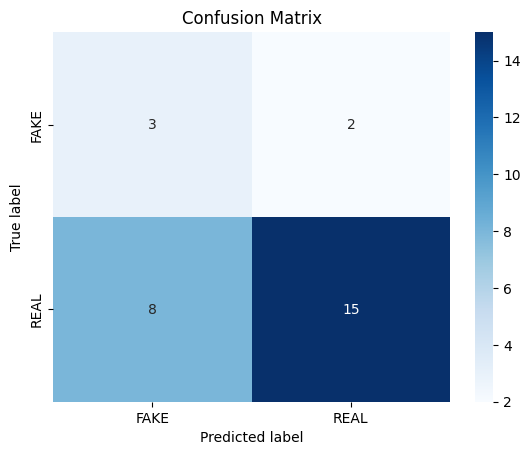

Accuracy: 64.29 %
Precision: 27.27 %
Recall: 60.0 %
F1 Score: 37.5 %
Specificity: 60.0 %
Misclassification Rate: 35.71 %


In [14]:
# Esegui GridSearchCV per trovare i migliori parametri
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=3)
gs.fit(X_train, y_train)

# Stampa i risultati
print("Model:", model)
print("Best score:", gs.best_score_)
print("Train score:", gs.score(X_train, y_train))
print("Test score:", gs.score(X_test, y_test))

# Stampa i migliori parametri trovati
print("Best parameters:", gs.best_params_)

# Cross-validation
cross_val_scores = cross_val_score(gs.best_estimator_, X, y, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

# Previsione sui dati di test
y_pred = gs.predict(X_test)

# Aggiungi la colonna 'Prediction' al dataframe results_df con le previsioni
results_df['Prediction'] = ''

# Aggiungi le previsioni ai dati di test corrispondenti
results_df.loc[X_test.index, 'Prediction'] = y_pred

# Salva il dataframe aggiornato in un file Excel
results_df.to_excel('DetectorResults.xlsx', index=False)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Convertire la confusion matrix in una lista
cm_list = np.array(cm).tolist()

# Assegna le variabili True Negatives, False Positives, False Negatives, True Positives
tn_fp, fn_tp = cm_list
tn, fp = tn_fp
fn, tp = fn_tp

# Calcola le metriche principali
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
precision = round(precision_score(y_test, y_pred, pos_label='REAL') * 100, 2)
recall = round(recall_score(y_test, y_pred, pos_label='REAL') * 100, 2)
f1 = round(f1_score(y_test, y_pred, pos_label='REAL') * 100, 2)
specificity = round((tn / (tn + fp)) * 100, 2)  # Specificity: TN / (TN + FP)
misclassification_rate = round(((fp + fn) / (tn + fp + fn + tp)) * 100, 2)  # Misclassification rate: (FP + FN) / Total

# Stampa delle metriche
print(f"Accuracy: {accuracy} %")
print(f"Precision: {precision} %")
print(f"Recall: {recall} %")
print(f"F1 Score: {f1} %")
print(f"Specificity: {specificity} %")
print(f"Misclassification Rate: {misclassification_rate} %")

### Model 5: BERT

In [26]:
#!pip install evaluate
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import evaluate

# Carica i dati dal file Excel
df_generated_news = pd.read_excel('Generated_fake_news.xlsx')
generated_articles = df_generated_news['Generated'].tolist()

# Funzione per formattare un articolo
def format_example(row):
    return f"ARTICLE {row['ID']}\nTITLE: {row['TITOLO']}\nTEXT: {row['TESTO']}\n"

# Funzione per creare la lista true_articles dal file TrueCTI.xlsx
def create_true_articles(true_df):
    true_articles = []
    # Carica i dati dal file Excel TrueCTI.xlsx
    true_data = pd.read_excel(true_df)  # Sostituisco load_data con pd.read_excel
    for idx in true_data.index:
        article = true_data.loc[idx]
        formatted_article = format_example(article)
        true_articles.append(formatted_article)
    return true_articles

# Carica il file TrueCTI.xlsx
true_df = 'TrueCTI.xlsx'
true_articles = create_true_articles(true_df)

# Creazione del dataframe 'results'
results = []
for generated in generated_articles:
    results.append({'Article': generated, 'Nature': 'Generated'})
for example in example_list:
    results.append({'Article': example, 'Nature': 'Fake News Example'})
for article in comparison_articles:
    results.append({'Article': article, 'Nature': 'Fake News for Comparison'})
for true in true_articles:
    results.append({'Article': true, 'Nature': 'True news'})

results_df = pd.DataFrame(results)

# Funzione per mappare la colonna "Nature" a etichette reali (FAKE o REAL)
def map_nature_to_label(nature):
    if nature in ['Generated', 'Fake News Example', 'Fake News for Comparison']:
        return 'FAKE'
    elif nature == 'True news':
        return 'REAL'
    return None

results_df['Label'] = results_df['Nature'].apply(map_nature_to_label)

# Usare la colonna 'Article' per l'input X e 'Label' come target y
X = results_df['Article']
y = results_df['Label']

# Filtra i dati per ciascuna categoria di 'Nature'
fake_news_example = results_df[results_df['Nature'] == 'Fake News Example']
fake_news_comparison = results_df[results_df['Nature'] == 'Fake News for Comparison']
true_news = results_df[results_df['Nature'] == 'True news']
generated_news = results_df[results_df['Nature'] == 'Generated']

# Suddividi il 60% di 'True news' per il train set e il restante 40% per il test set
true_news_train, true_news_test = train_test_split(true_news, test_size=0.4, random_state=42, stratify=true_news['Label'])

# Costruisci il train set con tutti gli articoli 'Fake News Example', 'Fake News for Comparison', e il 60% di 'True news'
train_set = pd.concat([fake_news_example, fake_news_comparison, true_news_train])

# Costruisci il test set con tutti gli articoli 'Generated' e il restante 40% di 'True news'
test_set = pd.concat([generated_news, true_news_test])

# Estrai gli articoli (X) e le etichette (y) per train e test set
X_train = train_set['Article']
y_train = train_set['Label'].map({'FAKE': 0, 'REAL': 1}).tolist()
X_test = test_set['Article']
y_test = test_set['Label'].map({'FAKE': 0, 'REAL': 1}).tolist()

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# --------------------------------- Applicazione di BERT ----------------------------------

# Tokenizer e modello
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Converti X_train e X_test in liste di stringhe
X_train = X_train.tolist()
X_test = X_test.tolist()

# Tokenizzazione dei dati di train e test
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=512)

# Conversione in dataset per Hugging Face
train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask'], 'labels': y_train})
test_dataset = Dataset.from_dict({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask'], 'labels': y_test})

# Definisci argomenti per il training
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    logging_dir='./logs',
)

# Funzione per calcolare le metriche
accuracy_metric = evaluate.load("accuracy")  # Use evaluate to load the metric

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_metric.compute(predictions=preds, references=labels)
    return {"accuracy": accuracy["accuracy"]}

# Trainer per addestrare il modello
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Addestramento
trainer.train()

# Valutazione
eval_result = trainer.evaluate()
print(f"Test Accuracy: {eval_result}")

# Previsione sui dati di test
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Confusion Matrix e metriche
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Train set size: 91
Test set size: 28


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.880446,0.392857
2,No log,0.752744,0.642857
3,No log,0.971586,0.607143
4,No log,0.984545,0.714286
5,No log,0.564251,0.857143
6,No log,1.785948,0.714286
7,No log,1.865035,0.714286
8,No log,1.854276,0.714286
9,No log,1.852060,0.714286
10,No log,1.849260,0.714286


Test Accuracy: {'eval_loss': 1.8492599725723267, 'eval_accuracy': 0.7142857142857143, 'eval_runtime': 0.8049, 'eval_samples_per_second': 34.786, 'eval_steps_per_second': 4.969, 'epoch': 10.0}
Accuracy: 0.7142857142857143
Precision: 1.0
Recall: 0.6521739130434783
F1 Score: 0.7894736842105263
Confusion Matrix: [[ 5  0]
 [ 8 15]]


### Model 6: BERT + LSTM

In [24]:
import torch
import torch.nn as nn
import pandas as pd
from transformers import BertTokenizer, BertModel, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
import evaluate

# Carica i dati dal file Excel
df_generated_news = pd.read_excel('Generated_fake_news.xlsx')
generated_articles = df_generated_news['Generated'].tolist()

# Funzione per formattare un articolo
def format_example(row):
    return f"ARTICLE {row['ID']}\nTITLE: {row['TITOLO']}\nTEXT: {row['TESTO']}\n"

# Funzione per creare la lista true_articles dal file TrueCTI.xlsx
def create_true_articles(true_df):
    true_articles = []
    # Carica i dati dal file Excel usando pandas
    true_data = pd.read_excel(true_df)
    for idx in true_data.index:
        article = true_data.loc[idx]
        formatted_article = format_example(article)
        true_articles.append(formatted_article)
    return true_articles

true_df = 'TrueCTI.xlsx'
true_articles = create_true_articles(true_df)

# Creazione del dataframe 'results'
results = []
for generated in generated_articles:
    results.append({'Article': generated, 'Nature': 'Generated'})
for example in example_list:
    results.append({'Article': example, 'Nature': 'Fake News Example'})
for article in comparison_articles:
    results.append({'Article': article, 'Nature': 'Fake News for Comparison'})
for true in true_articles:
    results.append({'Article': true, 'Nature': 'True news'})

results_df = pd.DataFrame(results)

# Funzione per mappare la colonna "Nature" a etichette reali (FAKE o REAL)
def map_nature_to_label(nature):
    if nature in ['Generated', 'Fake News Example', 'Fake News for Comparison']:
        return 'FAKE'
    elif nature == 'True news':
        return 'REAL'
    return None

results_df['Label'] = results_df['Nature'].apply(map_nature_to_label)

# Usare la colonna 'Article' per l'input X e 'Label' come target y
X = results_df['Article']
y = results_df['Label']

# Filtra i dati per ciascuna categoria di 'Nature'
fake_news_example = results_df[results_df['Nature'] == 'Fake News Example']
fake_news_comparison = results_df[results_df['Nature'] == 'Fake News for Comparison']
true_news = results_df[results_df['Nature'] == 'True news']
generated_news = results_df[results_df['Nature'] == 'Generated']

# Suddividi il 60% di 'True news' per il train set e il restante 40% per il test set
true_news_train, true_news_test = train_test_split(true_news, test_size=0.4, random_state=42, stratify=true_news['Label'])

# Costruisci il train set con tutti gli articoli 'Fake News Example', 'Fake News for Comparison', e il 60% di 'True news'
train_set = pd.concat([fake_news_example, fake_news_comparison, true_news_train])

# Costruisci il test set con tutti gli articoli 'Generated' e il restante 40% di 'True news'
test_set = pd.concat([generated_news, true_news_test])

# Estrai gli articoli (X) e le etichette (y) per train e test set
X_train = train_set['Article']
y_train = train_set['Label'].map({'FAKE': 0, 'REAL': 1}).tolist()
X_test = test_set['Article']
y_test = test_set['Label'].map({'FAKE': 0, 'REAL': 1}).tolist()

print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# --------------------------------- Applicazione di BERT + LSTM ----------------------------------

# Definisci il modello BERT + LSTM
class BERTLSTMClassifier(nn.Module):
    def __init__(self, bert_model_name='bert-base-uncased', lstm_hidden_size=128, num_labels=2):
        super(BERTLSTMClassifier, self).__init__()
        # Carica il modello BERT pre-addestrato
        self.bert = BertModel.from_pretrained(bert_model_name)
        # Aggiungi uno strato LSTM
        self.lstm = nn.LSTM(input_size=self.bert.config.hidden_size, hidden_size=lstm_hidden_size, batch_first=True)
        # Strato finale di classificazione
        self.classifier = nn.Linear(lstm_hidden_size, num_labels)
        # Funzione di loss
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, input_ids, attention_mask, labels=None):
        # Ottieni le embedding da BERT
        bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = bert_outputs.last_hidden_state  # [batch_size, seq_length, hidden_size]

        # Passa attraverso lo strato LSTM
        lstm_output, _ = self.lstm(last_hidden_state)  # [batch_size, seq_length, lstm_hidden_size]
        lstm_output = lstm_output[:, -1, :]  # Prendi l'ultimo stato nascosto

        # Classificazione
        logits = self.classifier(lstm_output)

        # Calcola la loss se le etichette sono fornite
        if labels is not None:
            loss = self.loss_fn(logits, labels)
            return loss, logits
        return logits

# Tokenizer e modello
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BERTLSTMClassifier()

# Converti X_train e X_test in liste di stringhe
X_train = X_train.tolist()
X_test = X_test.tolist()

# Tokenizzazione dei dati di train e test
train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(X_test, truncation=True, padding=True, max_length=512)

# Conversione in dataset per Hugging Face
train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask'], 'labels': y_train})
test_dataset = Dataset.from_dict({'input_ids': test_encodings['input_ids'], 'attention_mask': test_encodings['attention_mask'], 'labels': y_test})

# Definisci argomenti per il training
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=8,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    logging_dir='./logs',
)

# Funzione per calcolare le metriche
accuracy_metric = evaluate.load("accuracy")  # Use evaluate to load the metric

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_metric.compute(predictions=preds, references=labels)
    return {"accuracy": accuracy["accuracy"]}

# Trainer per addestrare il modello
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Addestramento
trainer.train()

# Valutazione
eval_result = trainer.evaluate()
print(f"Test Accuracy: {eval_result}")

# Previsione sui dati di test
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

# Confusion Matrix e metriche
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:", cm)

Train set size: 91
Test set size: 28


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.062957,0.178571
2,No log,0.912368,0.178571
3,No log,0.779545,0.571429
4,No log,0.587551,0.785714
5,No log,0.377608,0.857143
6,No log,0.620879,0.750000
7,No log,0.546980,0.821429
8,No log,0.450733,0.857143


Test Accuracy: {'eval_loss': 0.4507332444190979, 'eval_accuracy': 0.8571428571428571, 'eval_runtime': 0.8069, 'eval_samples_per_second': 34.7, 'eval_steps_per_second': 4.957, 'epoch': 8.0}
Accuracy: 0.8571428571428571
Precision: 1.0
Recall: 0.8260869565217391
F1 Score: 0.9047619047619048
Confusion Matrix: [[ 5  0]
 [ 4 19]]
